### K-nearest-neighbours classifier for time series
For time series, the most popular k-nearest-neighbours algorithm is based on [dynamic time warping](https://en.wikipedia.org/wiki/Dynamic_time_warping) (dtw) distance measure.

Here we look at the [BasicMotions data set](http://www.timeseriesclassification.com/description.php?Dataset=BasicMotions). The data was generated as part of a student project where four students performed four activities whilst wearing a smart watch. The watch collects 3D accelerometer and a 3D gyroscope It consists of four classes, which are walking, resting, running and badminton. Participants were required to record motion a total of five times, and the data is sampled once every tenth of a second, for a ten second period.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sktime.datasets import load_basic_motions
import sktime


In [2]:
X, y = load_basic_motions(return_X_y=True)


In [3]:
X

,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5
0,0 0.079106 1 0.079106 2 -0.903497 3...,0 0.394032 1 0.394032 2 -3.666397 3...,0 0.551444 1 0.551444 2 -0.282844 3...,0 0.351565 1 0.351565 2 -0.095881 3...,0 0.023970 1 0.023970 2 -0.319605 3...,0 0.633883 1 0.633883 2 0.972131 3...
1,0 0.377751 1 0.377751 2 2.952965 3...,0 -0.610850 1 -0.610850 2 0.970717 3...,0 -0.147376 1 -0.147376 2 -5.962515 3...,0 -0.103872 1 -0.103872 2 -7.593275 3...,0 -0.109198 1 -0.109198 2 -0.697804 3...,0 -0.037287 1 -0.037287 2 -2.865789 3...
2,0 -0.813905 1 -0.813905 2 -0.424628 3...,0 0.825666 1 0.825666 2 -1.305033 3...,0 0.032712 1 0.032712 2 0.826170 3...,0 0.021307 1 0.021307 2 -0.372872 3...,0 0.122515 1 0.122515 2 -0.045277 3...,0 0.775041 1 0.775041 2 0.383526 3...
3,0 0.289855 1 0.289855 2 -0.669185 3...,0 0.284130 1 0.284130 2 -0.210466 3...,0 0.213680 1 0.213680 2 0.252267 3...,0 -0.314278 1 -0.314278 2 0.018644 3...,0 0.074574 1 0.074574 2 0.007990 3...,0 -0.079901 1 -0.079901 2 0.237040 3...
4,0 -0.123238 1 -0.123238 2 -0.249547 3...,0 0.379341 1 0.379341 2 0.541501 3...,0 -0.286006 1 -0.286006 2 0.208420 3...,0 -0.098545 1 -0.098545 2 -0.023970 3...,0 0.058594 1 0.058594 2 0.175783 3...,0 -0.074574 1 -0.074574 2 0.114525 3...
...,...,...,...,...,...,...
35,0 -0.040961 1 -0.040961 2 0.338414 3...,0 -0.971100 1 -0.971100 2 -3.420216 3...,0 0.203560 1 0.203560 2 -2.053446 3...,0 0.061258 1 0.061258 2 0.250357 3...,0 -0.047941 1 -0.047941 2 -0.639209 3...,0 0.961478 1 0.961478 2 -0.298298 3...
36,0 -1.801504 1 -1.801504 2 -0.480725 3...,0 2.344990 1 2.344990 2 -0.994385 3...,0 0.281253 1 0.281253 2 0.378807 3...,0 0.716447 1 0.716447 2 -0.870923 3...,0 0.162466 1 0.162466 2 0.095881 3...,0 0.921527 1 0.921527 2 -0.474080 3...
37,0 -0.046089 1 -0.283051 2 -0.587748 3...,0 -0.738026 1 -0.314572 2 3.388108 3...,0 0.179667 1 -0.724257 2 -0.223563 3...,0 0.364882 1 -1.163894 2 -2.543521 3...,0 -0.237040 1 -0.101208 2 0.402169 3...,0 0.386189 1 -0.165129 2 -0.897557 3...
38,0 -2.178746 1 -2.178746 2 -0.448056 3...,0 -0.385371 1 -0.385371 2 -2.08943...,0 -0.805837 1 -0.805837 2 1.04617...,0 -0.039951 1 -0.039951 2 1.946925 3...,0 0.484734 1 0.484734 2 -0.524684 3...,0 1.054696 1 1.054696 2 2.436986 3...


In [5]:
X.iloc[:, [0]]

,dim_0
0,0 0.079106 1 0.079106 2 -0.903497 3...
1,0 0.377751 1 0.377751 2 2.952965 3...
2,0 -0.813905 1 -0.813905 2 -0.424628 3...
3,0 0.289855 1 0.289855 2 -0.669185 3...
4,0 -0.123238 1 -0.123238 2 -0.249547 3...
...,...
35,0 -0.040961 1 -0.040961 2 0.338414 3...
36,0 -1.801504 1 -1.801504 2 -0.480725 3...
37,0 -0.046089 1 -0.283051 2 -0.587748 3...
38,0 -2.178746 1 -2.178746 2 -0.448056 3...


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, [0]], y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60, 1) (60,) (20, 1) (20,)


In [8]:
X_train.head()

,dim_0
8,0 0.498121 1 0.498121 2 0.196889 3...
14,0 -0.947424 1 -0.947424 2 14.53912...
7,0 -0.366403 1 -0.366403 2 0.126830 3...
24,0 0.383922 1 0.383922 2 -0.272575 3...
22,0 0.175924 1 0.175924 2 0.194403 3...


In [8]:
y_train

5      standing
23      walking
25      walking
38    badminton
18      running
29      walking
8      standing
31    badminton
1      standing
30    badminton
10      running
21      walking
0      standing
36    badminton
13      running
21      walking
39    badminton
37    badminton
10      running
22      walking
30    badminton
12      running
11      running
15      running
9      standing
18      running
12      running
20      walking
14      running
27      walking
2      standing
33    badminton
39    badminton
26      walking
11      running
4      standing
6      standing
15      running
5      standing
3      standing
24      walking
16      running
28      walking
32    badminton
35    badminton
34    badminton
38    badminton
3      standing
32    badminton
4      standing
36    badminton
7      standing
25      walking
0      standing
9      standing
28      walking
34    badminton
17      running
1      standing
20      walking
dtype: object

Here we see that we used sklearn train test split. Why is it acceptable to use a randomization of time series in this instance?

In [9]:
labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

['badminton' 'running' 'standing' 'walking'] [16 14 16 14]


<AxesSubplot:>

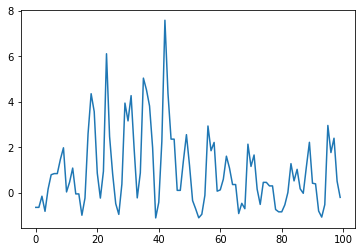

In [11]:
X_train.loc[y_train == label, "dim_0"].iloc[0].plot()

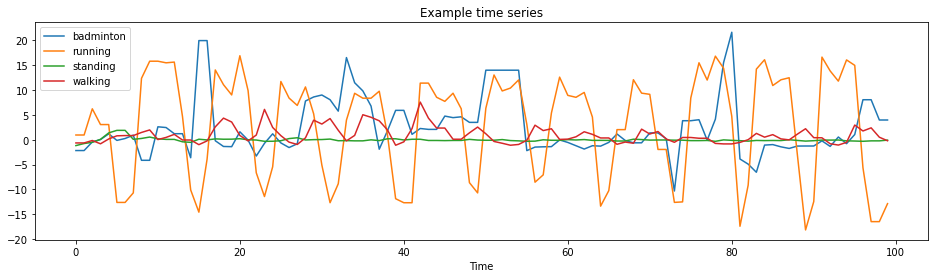

In [10]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
for label in labels:
    X_train.loc[y_train == label, "dim_0"].iloc[0].plot(ax=ax, label=label)
plt.legend()
ax.set(title="Example time series", xlabel="Time");

Take a look at one example of each class. We see that standing and walking have more stable patterns than the other two. Badminton appears to have irregular patterns with times of activity and times of inactivity. Running seems to have a consistent pattern, which makes sense.

Let's take a look at the two more active classes: badminton and running

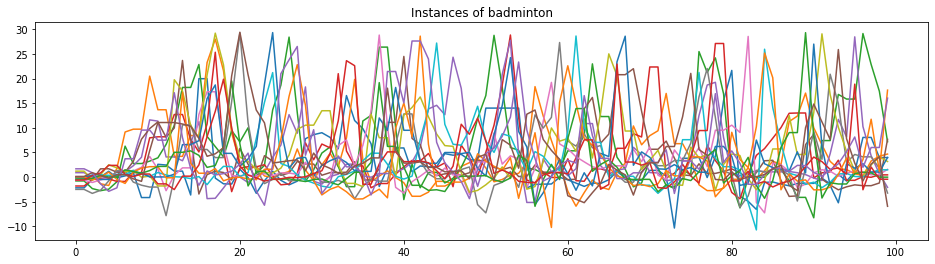

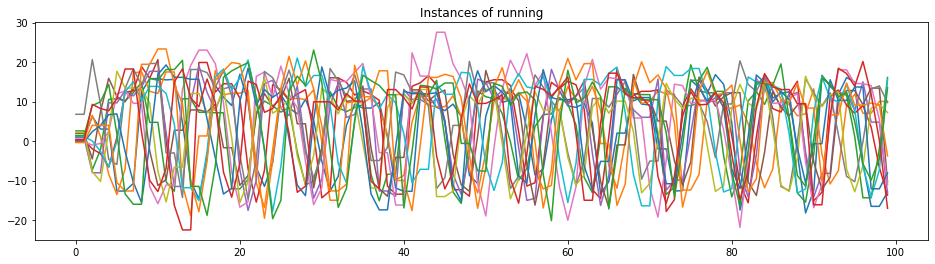

In [13]:
for label in labels[:2]:
    fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
    for instance in X_train.loc[y_train == label, "dim_0"]:
        ax.plot(instance)
    ax.set(title=f"Instances of {label}")

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sktime.transformations.panel.reduce import Tabularizer
knn =make_pipeline(
    Tabularizer(),
    KNeighborsClassifier(n_neighbors=1, metric="euclidean"))
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7

In [29]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

knn = KNeighborsTimeSeriesClassifier(n_neighbors=1, metric="dtw")
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

TypeError: __init__() got multiple values for keyword argument 'metric'

### Other classifiers
To find out what other algorithms we have implemented in sktime, you can use the utility function:

In [12]:
from sktime.utils import all_estimators

all_estimators(estimator_types="classifier")

[('BOSSEnsemble', sktime.classification.dictionary_based._boss.BOSSEnsemble),
 ('ColumnEnsembleClassifier',
  sktime.classification.compose._column_ensemble.ColumnEnsembleClassifier),
 ('ContractableBOSS',
  sktime.classification.dictionary_based._cboss.ContractableBOSS),
 ('ElasticEnsemble',
  sktime.classification.distance_based._elastic_ensemble.ElasticEnsemble),
 ('HIVECOTEV1', sktime.classification.hybrid._hivecote_v1.HIVECOTEV1),
 ('IndividualBOSS',
  sktime.classification.dictionary_based._boss.IndividualBOSS),
 ('IndividualTDE', sktime.classification.dictionary_based._tde.IndividualTDE),
 ('KNeighborsTimeSeriesClassifier',
  sktime.classification.distance_based._time_series_neighbors.KNeighborsTimeSeriesClassifier),
 ('MUSE', sktime.classification.dictionary_based._muse.MUSE),
 ('MrSEQLClassifier',
  sktime.classification.shapelet_based.mrseql.mrseql.MrSEQLClassifier),
 ('ProximityForest',
  sktime.classification.distance_based._proximity_forest.ProximityForest),
 ('ProximitySt